# Sabermetrics Project 
** Maxwell Lambek**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
%matplotlib inline

# pick the team you are intersted in and for what years years \in [1990,2017]
myteam = 'BOS'
yearStart = 2000
yearEnd = 2017

In [2]:
headernames = 'Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,HomeRunsScore,LengthInOuts,DayNight,CompletionInfo,ForfeitInfo,ProtestInfo,ParkID,Attendence,Duration,VisitorLineScore,HomeLineScore,VisitorAB,VisitorH,VisitorD,VisitorT,VisitorHR,VisitorRBI,VisitorSH,VisitorSF,VisitorHBP,VisitorBB,VisitorIBB,VisitorK,VisitorSB,VisitorCS,VisitorGDP,VisitorCI,VisitorLOB,VisitorPitchers,VisitorER,VisitorTER,VisitorWP,VisitorBalks,VisitorPO,VisitorA,VisitorE,VisitorPassed,VisitorDB,VisitorTP,HomeAB,HomeH,HomeD,HomeT,HomeHR,HomeRBI,HomeSH,HomeSF,HomeHBP,HomeBB,HomeIBB,HomeK,HomeSB,HomeCS,HomeGDP,HomeCI,HomeLOB,HomePitchers,HomeER,HomeTER,HomeWP,HomeBalks,HomePO,HomeA,HomeE,HomePassed,HomeDB,HomeTP,UmpireHID,UmpireHName,Umpire1BID,Umpire1BName,Umpire2BID,Umpire2BName,Umpire3BID,Umpire3BName,UmpireLFID,UmpireLFName,UmpireRFID,UmpireRFName,VisitorManagerID,VisitorManagerName,HomeManagerID,HomeManagerName,WinningPitcherID,WinningPitcherName,LosingPitcherID,LosingPitcherNAme,SavingPitcherID,SavingPitcherName,GameWinningRBIID,GameWinningRBIName,VisitorStartingPitcherID,VisitorStartingPitcherName,HomeStartingPitcherID,HomeStartingPitcherName,VisitorBatting1PlayerID,VisitorBatting1Name,VisitorBatting1Position,VisitorBatting2PlayerID,VisitorBatting2Name,VisitorBatting2Position,VisitorBatting3PlayerID,VisitorBatting3Name,VisitorBatting3Position,VisitorBatting4PlayerID,VisitorBatting4Name,VisitorBatting4Position,VisitorBatting5PlayerID,VisitorBatting5Name,VisitorBatting5Position,VisitorBatting6PlayerID,VisitorBatting6Name,VisitorBatting6Position,VisitorBatting7PlayerID,VisitorBatting7Name,VisitorBatting7Position,VisitorBatting8PlayerID,VisitorBatting8Name,VisitorBatting8Position,VisitorBatting9PlayerID,VisitorBatting9Name,VisitorBatting9Position,HomeBatting1PlayerID,HomeBatting1Name,HomeBatting1Position,HomeBatting2PlayerID,HomeBatting2Name,HomeBatting2Position,HomeBatting3PlayerID,HomeBatting3Name,HomeBatting3Position,HomeBatting4PlayerID,HomeBatting4Name,HomeBatting4Position,HomeBatting5PlayerID,HomeBatting5Name,HomeBatting5Position,HomeBatting6PlayerID,HomeBatting6Name,HomeBatting6Position,HomeBatting7PlayerID,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo'
hn = headernames.split(",")
datadate = 'data/data' + str(yearStart) + '.csv'
data = pd.read_csv(datadate,header=None, names=hn)
for ii in range(yearStart+1,yearEnd+1):
    datadate = 'data/data' + str(ii) + '.csv'
    d = pd.read_csv(datadate,header=None, names=hn)
    data = data.append(d)

daylist = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

BOS home day winrates


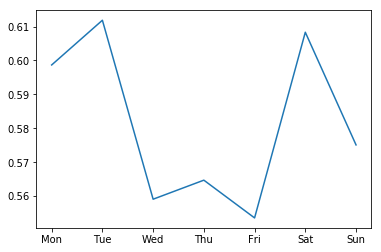

BOS away day winrates


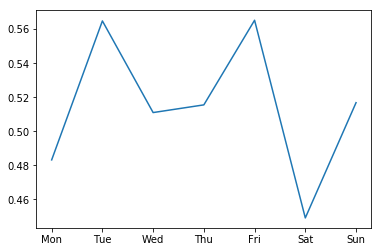

In [44]:
teams = np.unique(data['VisitingTeam'])
teamHS = {}
teamAS = {}
for team_name in teams:
    #team_name = 'NYN'
    ndaway = data.loc[(data['VisitingTeam'] == team_name)] #or ((data['hometeam'] == team_name) )]
    ndhome = data.loc[(data['HomeTeam'] == team_name)]
    awayScores = []
    homeScores = []
    for date in daylist:
        awayday = ndaway.loc[(ndaway['DayOfWeek'] == date)]
        awaywin = np.sum(awayday['VisitorRunsScored'] > awayday['HomeRunsScore'] )
        away_wr = awaywin/len(awayday)
        homeday = ndhome.loc[(ndhome['DayOfWeek'] == date)]
        homewin = np.sum(homeday['VisitorRunsScored'] < homeday['HomeRunsScore'] )
        home_wr = homewin/len(homeday)
        awayScores = awayScores + [away_wr]
        homeScores = homeScores + [home_wr]
        
        #print(homewin,home_wr, awaywin,away_wr, date)
    teamHS[team_name] = homeScores
    teamAS[team_name] = awayScores
plt.xticks([0,1,2,3,4,5,6],daylist)
plt.plot(teamHS[myteam])
title = myteam + ' home day winrates'
print(title)
plt.tile(title,reps=1,)
plt.show()

plt.xticks([0,1,2,3,4,5,6],daylist)
plt.plot(teamAS[myteam])
title = myteam + ' away day winrates'
print(title)
plt.tile(title,reps=1,)
plt.show()

In [45]:
#for league comparison
lgAwayScores = []
lgHomeScores = []
for date in daylist:
    awayday = data.loc[(data['DayOfWeek'] == date)]
    awaywin = np.sum(awayday['VisitorRunsScored'] > awayday['HomeRunsScore'])
    away_wr = awaywin/len(awayday)
    homewin = np.sum(awayday['VisitorRunsScored'] < awayday['HomeRunsScore'] )
    home_wr = homewin/len(awayday)
    lgAwayScores = lgAwayScores + [away_wr]
    lgHomeScores = lgHomeScores + [home_wr]
    print(homewin,home_wr, awaywin,away_wr, date)


2383 0.533826164875 2080 0.465949820789 Mon
3526 0.5375 3034 0.4625 Tue
3627 0.540053603335 3089 0.459946396665 Wed
2646 0.531325301205 2330 0.467871485944 Thu
3714 0.536085450346 3214 0.463914549654 Fri
3884 0.55006373035 3177 0.44993626965 Sat
3826 0.545091893432 3192 0.454765636131 Sun


Difference between league away averages and, BOS day winrates


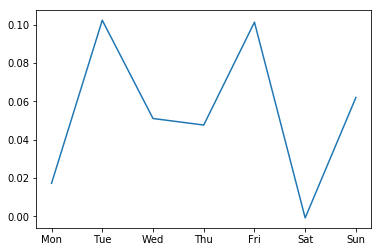

Difference between league home averages and, BOS day winrates


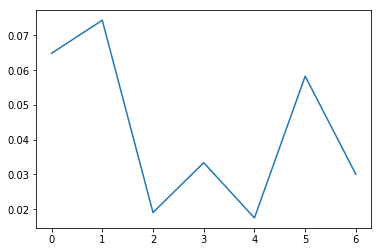

In [46]:
#print(np.subtract(lgHomeScores,homeScores))
plt.xticks([0,1,2,3,4,5,6],daylist)
plt.plot(np.subtract(teamAS[myteam],lgAwayScores))
title ='Difference between league away averages and, '+myteam + ' day winrates'
print(title)
plt.tile(title,reps=1,)
plt.show()

#print(lgAwayScores)
#print(np.subtract(lgAwayScores,awayScores))
plt.plot(np.subtract(teamHS[myteam], lgHomeScores))
title ='Difference between league home averages and, '+myteam + ' day winrates'
print(title)
plt.tile(title,reps=1,)
plt.show()

In [47]:
lgcompare = stats.ttest_ind(teamHS[myteam], lgHomeScores)
lgcompare2 = stats.ttest_ind(teamAS[myteam], lgAwayScores)
print(lgcompare, '\n',lgcompare2)

Ttest_indResult(statistic=4.4670609042142821, pvalue=0.00076959633600897736) 
 Ttest_indResult(statistic=3.422881512960438, pvalue=0.005051620338343909)


In [51]:
tstath = 0.0
pstath = 0.0
tstata = 0.0
pstata = 0.0
for team in teams:
    mt = np.subtract(teamHS[myteam], lgAwayScores)
    ot = np.subtract(teamHS[team], lgAwayScores)
    a = stats.ttest_ind(mt,ot,equal_var = True)
    #a = stats.ttest_ind(teamHS[myteam]-lgAwayScores,teamHS[team],equal_var = True)
    tstath = tstath + a.statistic
    pstath = pstath + a.pvalue
    mt = np.subtract(teamAS[myteam], lgHomeScores)
    ot = np.subtract(teamAS[team], lgHomeScores)
    a = stats.ttest_ind(mt,ot,equal_var = True)
    tstata = tstata + a.statistic
    pstata = pstata + a.pvalue
tstath = tstath/len(teams)
pstath = pstath/len(teams)
tstata = tstata/len(teams)
pstata = pstata/len(teams)
print("average T test for", myteam, "at home compared to each team: ", tstath, " With p value: ", pstath)
print("average T test for", myteam, "when away compared to each team: ", tstata, " With p value: ", pstata)


average T test for BOS at home compared to each team:  2.53327624916  With p value:  0.129829695368
average T test for BOS when away compared to each team:  2.64811643709  With p value:  0.150717742553
